## 빅데이터 실습

### 타이타닉 생존자 상관분석
- 상관계수로 두 변수간의 상관관계 유추
    - correlation coefficient

- 상관계수 값(-1 ~ 0 ~ +1)
    - 음수면 서로간의 음의 상관관계(한쪽 값이 올라가면 다른 값은 떨어짐)
    - 양수면 서로강의 양의 상관관계(한쪽 값이 올라가면 다른 값도 올라감)
    - 0.0~0.2: 상관관계 거의 없음
    - 0.2~0.4: 약간 상관관계 있음
    - 0.4~0.6: 상관관계 있음
    - 0.6~0.8: 강한 상관관계 있음
    - 0.8~1.0: 서로간 매우 긴밀한 연관이 있음. 상관관계 최고

#### 데이터 수집

##### Seaborn 테스트데이터

In [2]:
# 필수 라이브러리 사용 등록
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#한글 깨짐 문제 해결

from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()  
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [4]:
sns.set_style('darkgrid')

In [5]:
# seaborn 타이타닉 데이터
dfTitanic = sns.load_dataset('titanic')
dfTitanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


##### 타이타닉 생존자 데이터의 문제
- 결측치가 많음 -> 결측치 제거 필요

In [6]:
dfTitanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- age(177), embarked / embark_town(2), deck(688) 결측치 확인

##### 결측치 채워넣는 방법
- DF.describe()로 구해지는 기술통계값을 기준으로 채워넣는게 일반적
1. 평균값으로 채워넣음
2. 중앙값으로 채워넣음
3. 최소값 / 최대값으로 채워넣음 - 좋은 방법x
4. 최빈값으로 채워넣음
5. 최소빈도값 - 너무 데이터가 없어서 통계치에 반영하기 힘들 때 
6. 기타

In [7]:
dfTitanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#조사결과 나이대는 20대 중후반이 가장 많음
ageMedian = dfTitanic['age'].median()

In [9]:
#나이의 빈값을 중앙값으로 채워넣음
dfTitanic['age'] = dfTitanic['age'].fillna(ageMedian)

In [10]:
dfTitanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
# 정박항 결측치 입력, 대부분 S(Southampton)에서 배를 탔음
dfTitanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [12]:
dfTitanic['embarked'] = dfTitanic['embarked'].fillna('S')
dfTitanic['embark_town'] = dfTitanic['embarked'].fillna('Southampton')

In [13]:
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [14]:
# 데크 결측치 제거
dfTitanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [15]:
# 데크가 제일 많은 빈도로 나온 것: C 데크
# 각 데크별로 빈도의 차이가 별로 없기 때문에 C를 넣으면 데이터 이상해질 수 있움
# C 데크를 입력, 데크로 상관관계 비교 X(지표로서 사용 X)
dfTitanic['deck'] = dfTitanic['deck'].fillna('C')

In [16]:
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [17]:
dfTitanic.to_excel('./data/타이타닉생존자_전처리완.xlsx', index=False)

##### 시각화

In [18]:
dfTitanic['survived'][dfTitanic['sex']=='male'].value_counts()

survived
0    468
1    109
Name: count, dtype: int64

c:\DEV\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\DEV\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\DEV\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45769 (\N{HANGUL SYLLABLE NIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\DEV\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\DEV\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\DEV\Python312\Lib\site-packages\IPython\core\pylabtools.py:152:

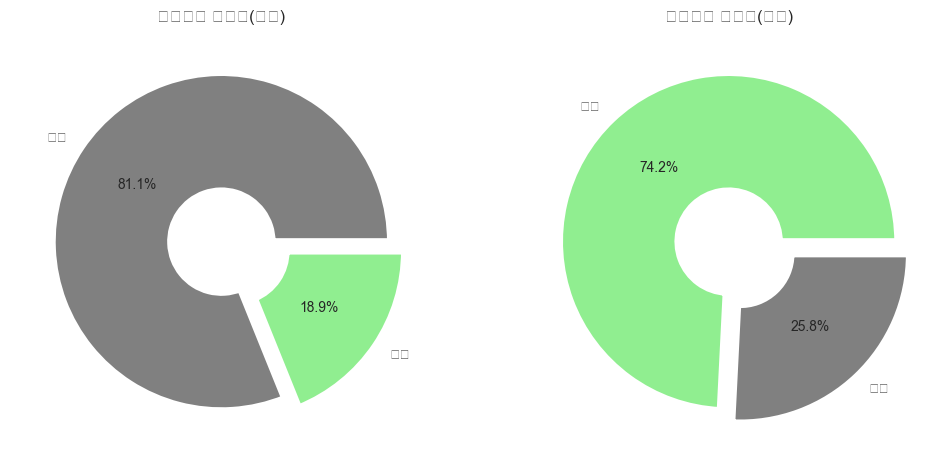

In [19]:
# 파이차트
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# 판다스 DF, 시리즈는 matplotlib 차트로 그릴 수 있음
maleLabels = ['사망', '생존']
femaleLabels = ['생존', '사망']
maleColors = ['gray', 'lightgreen']
femaleColors = ['lightgreen', 'gray']
wedgeProps = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

dfTitanic['survived'][dfTitanic['sex']=='male'].value_counts().plot.pie(ax=ax[0], 
                                shadow=False, explode=[0, 0.1], autopct='%1.1f%%' , labels=maleLabels,
                                colors=maleColors, wedgeprops=wedgeProps)
dfTitanic['survived'][dfTitanic['sex']=='female'].value_counts().plot.pie(ax=ax[1], 
                                shadow=False, explode=[0, 0.1], autopct='%1.1f%%', labels=femaleLabels,
                                colors=femaleColors, wedgeprops=wedgeProps)

ax[0].set_title('타이타닉 생존률(남성)')
ax[1].set_title('타이타닉 생존률(여성)')
ax[0].set_axis_off()    #축의 count 라벨 제거
ax[1].set_axis_off()    #축의 count 라벨 제거

plt.show()

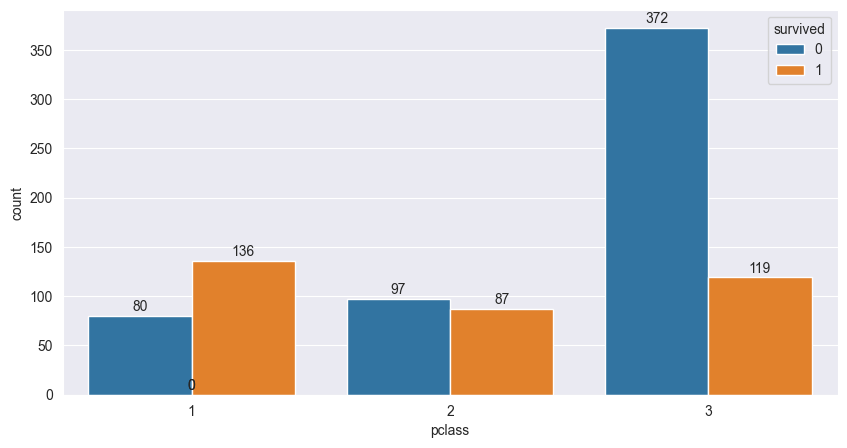

In [20]:
# 등급(pclass) 생존자 수 바차트
plt.figure(figsize=(10, 5))
#stat=count. percent 등이 있음
ax = sns.countplot(dfTitanic, x='pclass', hue='survived', stat='count') 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, int(height), ha = 'center', size=10)

plt.show()

In [21]:
dfTitanic[dfTitanic['pclass'] == 1]['alive'].value_counts()

alive
yes    136
no      80
Name: count, dtype: int64

##### 데이터 속성(변수)간 상관관계
- pandas DF에 corr() 함수 사용

In [22]:
# 상관계수는 object, category는 적용 불가
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [23]:
dfTitanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,S,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,C,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,S,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,S,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,S,no,True


In [24]:
#상관계수 메서드: pearson, kendall, spearman
#상관관계를 모든 속성으로 다 집계
dfTitanic[['survived', 'pclass', 'age',	'sibsp', 'parch', 'fare', 'adult_male',	'alone']].corr(method='pearson')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [26]:
#각 두가지 속성끼리 상관관계 도출
dfTitanic['survived'].corr(dfTitanic['fare'])

0.2573065223849622

c:\DEV\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\DEV\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\DEV\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45769 (\N{HANGUL SYLLABLE NIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\DEV\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\DEV\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\DEV\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: U

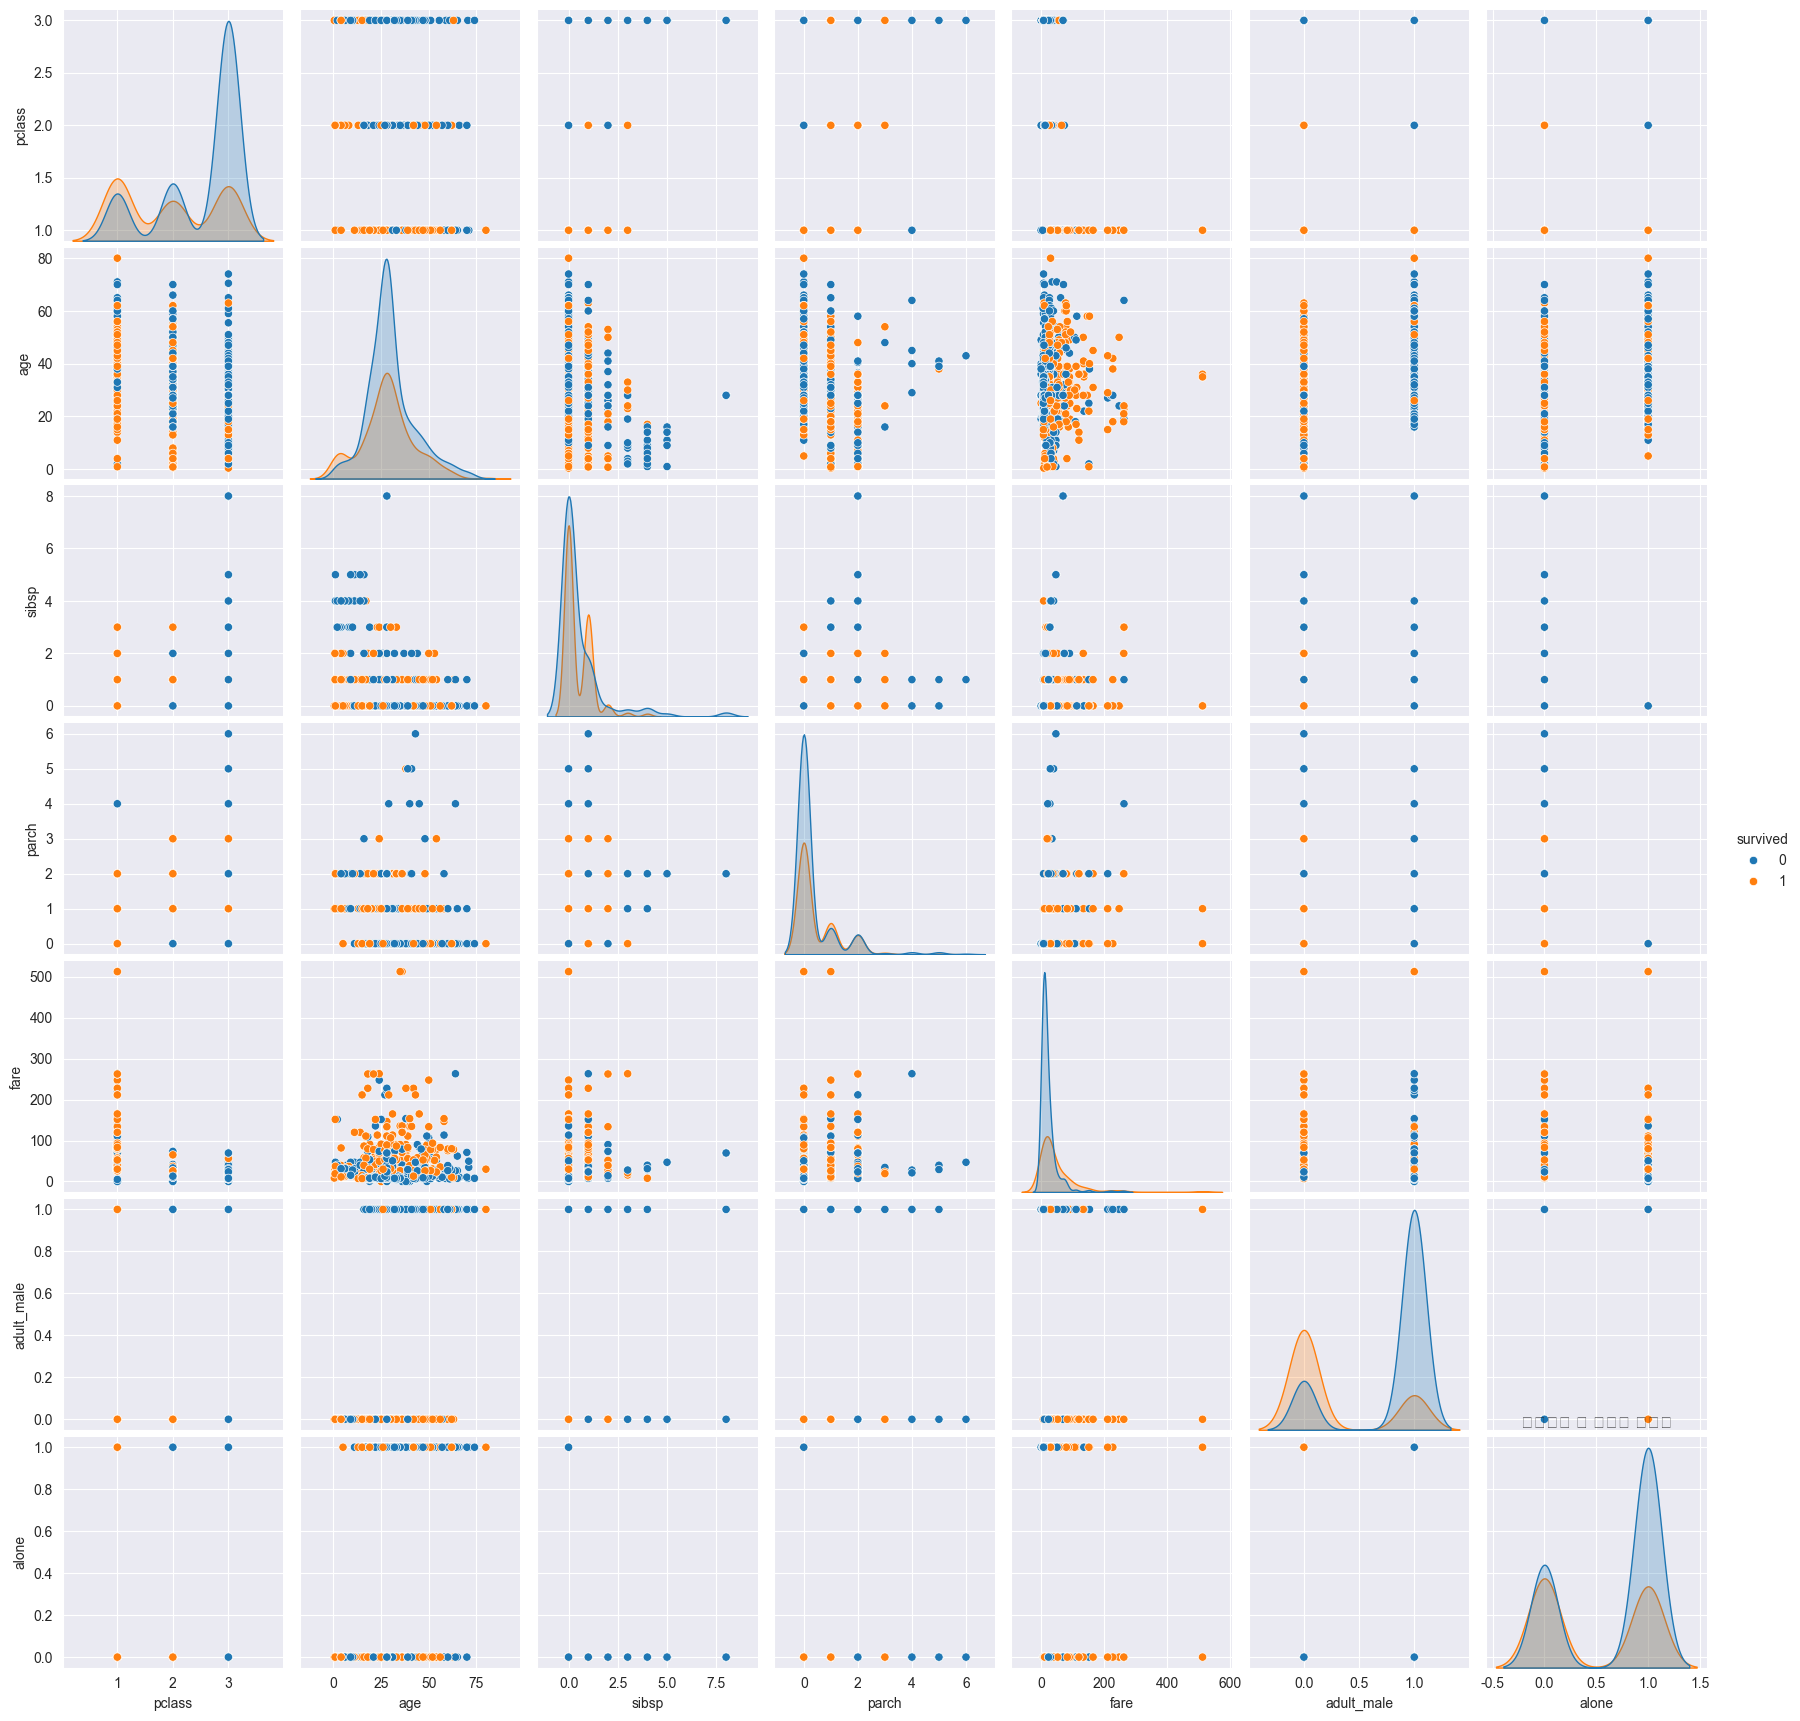

In [ ]:
sns.pairplot(dfTitanic, hue='survived')
plt.title('타이타닉 각 속성별 산정도')
plt.show()

In [ ]:
dfTitanic = pd.read_excel('./data/타이타닉생존자_전처리완.xlsx')

In [ ]:
# 상관관계를 히트맵으로 시각화
def categoryAge(x):
    if x < 10: return 0
    elif x < 20: return 1
    elif x < 30: return 2
    elif x < 40: return 3
    elif x < 50: return 4
    elif x < 60: return 5
    elif x < 70: return 6
    elif x < 80: return 7
    else: return 8

In [ ]:
# 히트맵에서 사용하기 위해 컬럼 재생산
dfTitanic['age2'] = dfTitanic['age'].apply(categoryAge) #컬럼의 값을 뒤에 있는 함수를 적용해서 값을 낼 수 있음
dfTitanic['sex'] = dfTitanic['sex'].map({'male': 1, 'female': 0})   #여러번 수행하면 안됨
dfTitanic['family'] = dfTitanic['sibsp'] + dfTitanic['parch'] + 1

In [ ]:
dfTitanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
886,0,2,1,27.0,0,0,13.00,S,Second,man,True,C,S,no,True,2,1
887,1,1,0,19.0,0,0,30.00,S,First,woman,False,B,S,yes,True,1,1
888,0,3,0,28.0,1,2,23.45,S,Third,woman,False,C,S,no,False,2,4
889,1,1,1,26.0,0,0,30.00,C,First,man,True,C,C,yes,True,2,1
890,0,3,1,32.0,0,0,7.75,Q,Third,man,True,C,Q,no,True,3,1


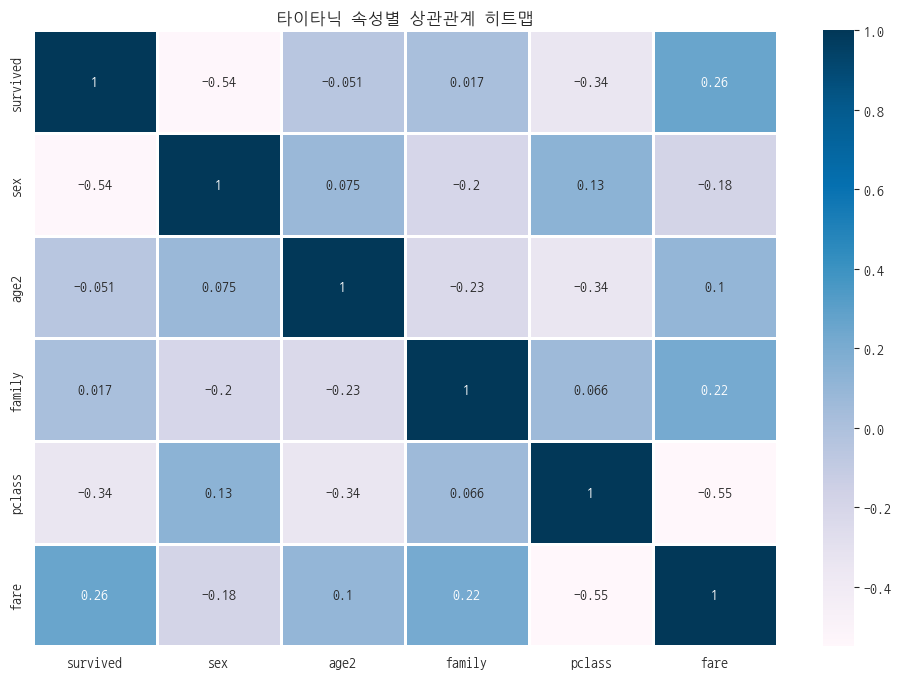

In [ ]:
# 히트맵
plt.figure(figsize=(12, 8))
hData = dfTitanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]
# 속성 정리(square=True: 각 히트맵 셀을 정사각형으로 만듦, annot=True: 값 화면 표시)
sns.heatmap(hData.astype(float).corr(), linewidths=1.0, square=False, vmax=1.0, cmap='PuBu', 
            linecolor='white', annot=True, annot_kws={'size':10})

plt.title('타이타닉 속성별 상관관계 히트맵')
plt.show()

- 상관관계는 음의 관계, 양의 관계 모두 중요, 절대값으로 0.4~1.0 사이의 값에 대한 속성간의 분석 시작하면 됨
- 0.2 이하의 데이터는 분석 대상에서 제외